In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

EXPLORING CATEGORIES


In [5]:
df['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

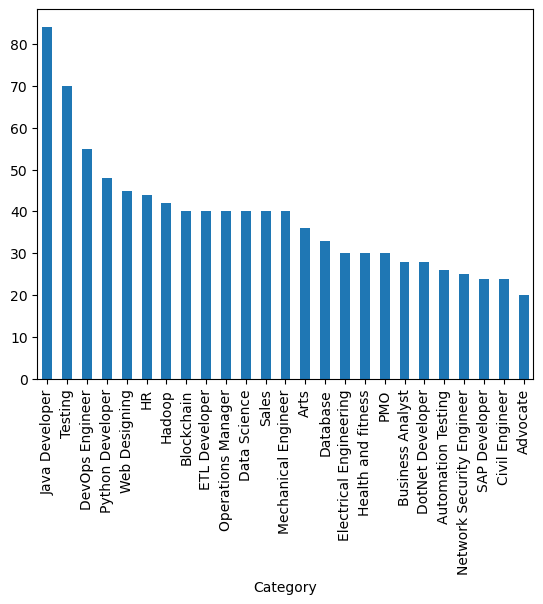

In [6]:
df['Category'].value_counts().plot(kind='bar')
plt.show()

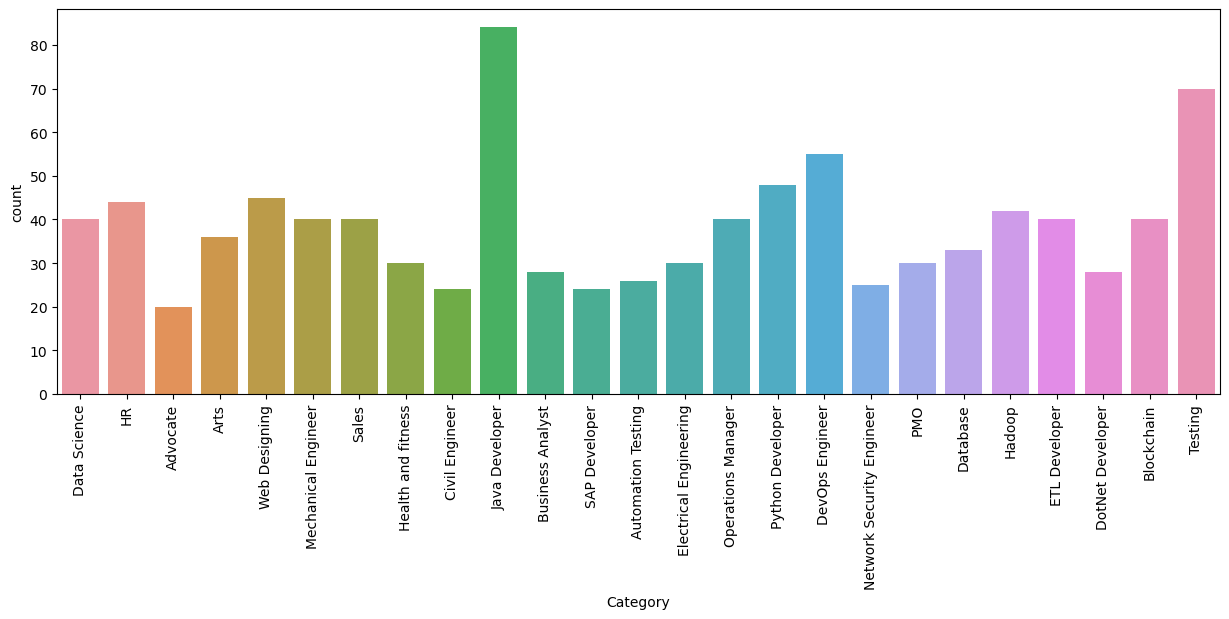

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

(-1.0999999864166479,
 1.0999999993531668,
 -1.0999999999871193,
 1.0999999999990386)

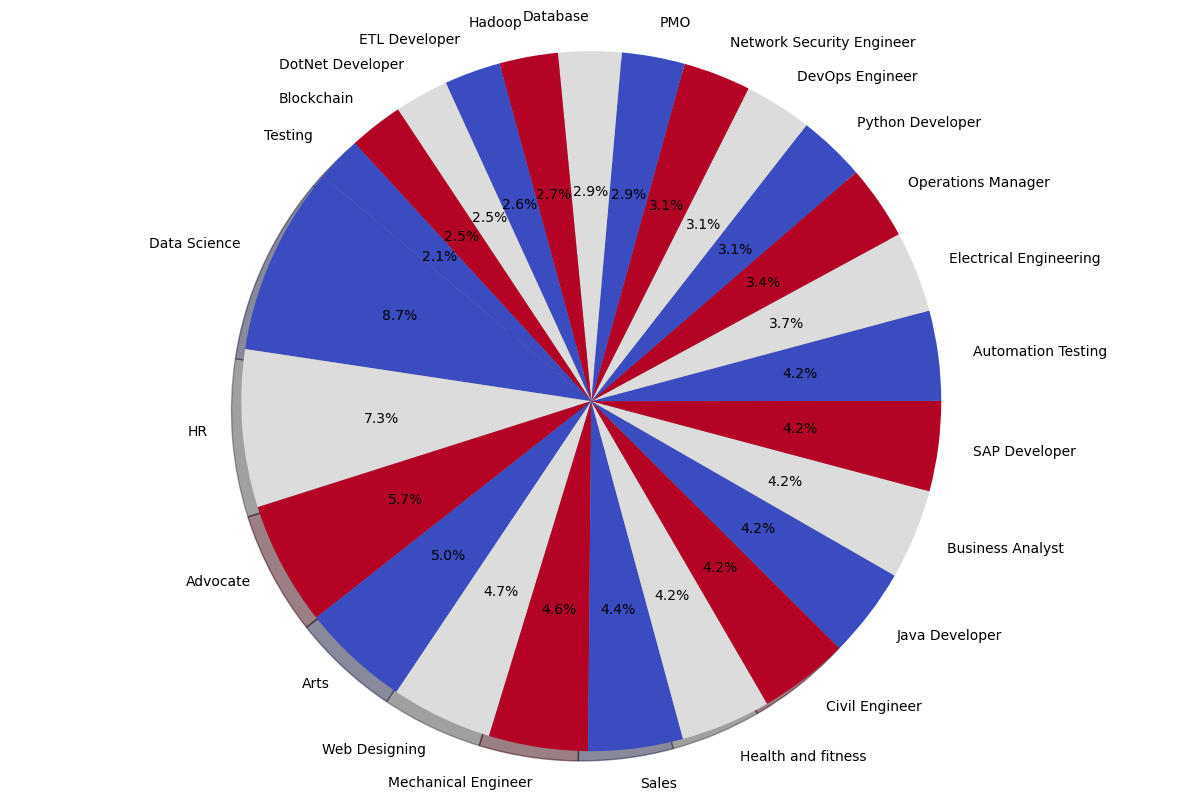

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3)), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Distribution Of Categories


In [34]:
df['Category'][0:24]

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
20    6
21    6
22    6
23    6
Name: Category, dtype: int32

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data:

1.URLs,
2.hashtags,
3.mentions,
4.special characters,
5.punctuations

In [13]:
import re
def cleanResume(text):
    cleanTxt = re.sub('http\s+\s','',text) #removing http links
    cleanTxt = re.sub('@\s+','',cleanTxt) #removing https links
    return cleanTxt

In [14]:
cleanResume("my website link is this http://heloworld and access it @gmail.com")

'my website link is this http://heloworld and access it @gmail.com'

words into categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [16]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [17]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredTaxt=tfidf.transform(df['Resume'])

Splitting 
Now let's train the model and print the classification report:

Prediction System

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(requiredTaxt,df['Category'],test_size=0.2,random_state=42)   # Splitting the data into training and testing sets

In [21]:
x_train.shape

(769, 7384)

In [22]:
x_test.shape

(193, 7384)

Now let's train the model and print the classification report:

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [32]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

Prediction System


In [26]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [27]:
myresume="""HARIOM SINGH
SIRGOVERDHAN VARANASI UTTAR PRADESH | P: +917479568204
hariombhu7479@gmail.com | https://www.linkedin.com/in/hariom-singh-221794296/| https://github.com/hariombhu
EXPERIENCE
DFIR (Digital Forensic and Incident Response)[LINK]
Training and internship Program Jun 2024 – Aug 2024
● Coordinated and executed incident response plan for a variety of cyber incidents, including data breaches, malware infections, and insider threats, minimizing impact and ensuring swift recovery
AI:Transformative Learning [LINK] Jan 2025 – Feb 2025
Internship program(Microsoft and Edunet Foundation)
● Designed and developed an AI-powered healthcare assistant chatbot to provide personalized medical assistant
Modern Web Application With MERN Stack [LINK] Feb 2025 – Mar 2025
Internship Program(EY and Aicte)
●Developed a Personal Finance Manager web applications using the MERN (MongoDB, Express.js, React, Node.js) stack. .
.
PROJECTS
COURSES RECOMMENDATION SYSTEM [LINK]
●Developed a machine learning-based course recommendation system in three months using Python and machine learning techniques.
KEYLOGGER [LINK]
● Developed a Python-based keylogger to capture keystrokes, process inputs, and log user activity efficiently
SOLAR POWER PREDICTION [LINK]
●Developed a solar power prediction model using linear regression, enhancing forecast accuracy and optimizing energy management.
POSITIONS OF RESPONSIBILITY
ELIXIR COMMUNITY – IIT, PATNA
Crew member Nov 2024–Present
● Present Led the design and execution of the 'ANWESHA' cultural program, engaging 500+ attendees, and spearheaded promotional campaigns for the “Crew” program, attracting 100+ participants.
PLACEMENT CELL – NFSU, TRIPURA
Student Coordinator Jun 2024 – Present
●Documented the onboarding process for new recruiters and maintained detailed records of student profiles, ensuring seamless alignment with recruiter requirements and improving placement efficiency.
EDUCATION
NATIONAL FORENSIC SCIENCES UNIVERSITY –Tripura, Agartala Aug 2023 – July 2027
●Bachelor of Engineering, Computer Science (Cyber Security); Aggregate CGPA – 9.3
INDIAN INSTITUTE OF TECHNOLOGY –Bihta, Patna (Hybrid) Jun 2023 – July 2026
● Bachelor of Science, Computer Science (Data Analytics); Aggregate CGPA – 7.83
EVENTS
● 3DPCOE HACKATHON (top 5 finalist in our category)
● IDEATION HACKATHON (TOP 5 POSITION)
SKILLS AND EXPERTISE
Language : Python, C, C++,C#,Python, Familier:Java,Assembly,JavaScript
Operating System : Ubuntu,Windows
Libraries : Python(Numpy,Pandas,Scikit-learn,Seaborn)
Certifications & Training: ADCA, 3-day workshop on cyber security and digital forensic, Drone forensic, Space science and technology awareness training by ISRO"""

In [36]:
import pickle

#load the trained classifier
clf=pickle.load(open('clf.pkl','rb'))

#clean the input resume
cleaned_resume=cleanResume(myresume)

#transform the cleaned resume using the trained tfidfvectorizer
input_features=tfidf.transform([cleaned_resume])

#make the prediction using the loaded classifier
prediction_id=clf.predict(input_features)[0]

#map category ID to category name
category_mapping={
    15:"Java Developer",
    23:"Testing",
    8:"Devops Engineer",
    20:"python Developer",
    24:"web Designing",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operational Manager",
    6:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database",
    11:"Eletrical Engineering",
    14:"Health and fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"Dotnet Developer",
    2:"Automation Testing",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate",

}

category_name=category_mapping.get(prediction_id,"Unknown")
print("Predicted Category:",category_name)
print(prediction_id)

Predicted Category: Data Science
6
